### Replication : Long Put Down & In

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from configuration import ConfigurationBuilder
from pricing import BlackScholesMerton, GeometricBrownianMotion

In [2]:
configuration = ConfigurationBuilder(
    kind='put',
    spot=100.0,
    sigma=0.30,
    maturity=365,
    risk_free_rate=0,
    dividend_yield=0,
)

#### With Black Scholes Merton

In [3]:
barrier = 70
shift = 3

configuration.strike = barrier
option_1 = BlackScholesMerton(configuration)

configuration.strike = barrier - shift
option_2 = BlackScholesMerton(configuration)

In [4]:
quantity = (configuration.spot - barrier) / shift

In [5]:
pdi = (option_1 * -1) * (quantity + 1) + option_2 * quantity

In [6]:
print('price', abs(pdi.price()))
print('delta', pdi.delta())
print('gamma', pdi.gamma())
print('vega', pdi.vega())
print('theta', pdi.theta())
print('rho', pdi.rho())

price 5.43202077982245
delta 0.30547008306025203
gamma -0.015535227460800653
vega -0.4660568238240195
theta 0.019153020157151493
rho 0.35979029085847636


#### With Geometric Brownian Motion

In [7]:
configuration.strike = configuration.spot
configuration.simulation = 40000
configuration.steps = 365
gbm_pricing = GeometricBrownianMotion(configuration)
gbm_pricing.run_simulation()

In [8]:
gbm_pricing.put_down_in(barrier=barrier)

5.888094896472284

### Sensitivity : Long Put Down & In

In [9]:
# For spot price between 10 and 190

data = pd.DataFrame(columns=['price', 'delta', 'gamma', 'vega', 'theta', 'rho'])

for i in range(10, 190):
    
    configuration.spot = i
    
    configuration.strike = barrier
    option_1 = BlackScholesMerton(configuration)

    configuration.strike = barrier - shift
    option_2 = BlackScholesMerton(configuration)
    
    pdi = (option_1 * -1) * (quantity + 1) + option_2 * quantity
    
    data.loc[i] = (abs(pdi.price()), pdi.delta(), pdi.gamma(), pdi.vega(), pdi.theta(), pdi.rho())

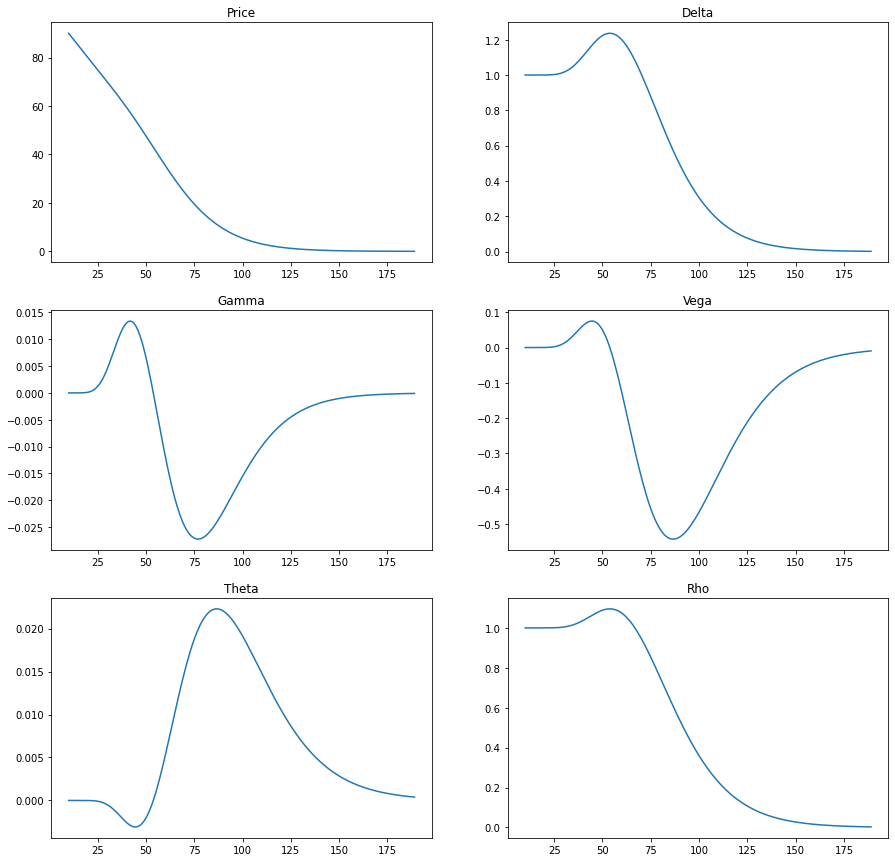

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2)
data["price"].plot(ax=axes[0,0], title='Price')
data["delta"].plot(ax=axes[0,1], title='Delta')
data["gamma"].plot(ax=axes[1,0], title='Gamma')
data["vega"].plot(ax=axes[1,1], title='Vega')
data["theta"].plot(ax=axes[2,0], title='Theta')
data["rho"].plot(ax=axes[2,1], title='Rho')
fig.set_figheight(15)
fig.set_figwidth(15);